In [ ]:
#importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#lê os arquivos movie e ratings
filme = pd.read_csv('movies.csv',usecols=['movieId','title'],dtype={'movieId': 'int32', 'title': 'str'})
avaliacao=pd.read_csv('ratings.csv',usecols=['userId', 'movieId', 'rating'],
    dtype={'userId': 'int32', 'movieId': 'int32', 'rating': 'float32'})

In [ ]:
df = pd.merge(avaliacao,filme,on='movieId')

In [ ]:
#contando o total de avaliação que cada filme tem
combinacaoFilmeAvaliacao = df.dropna(axis = 0, subset = ['title'])
totalAvaliacaoFilme = (combinacaoFilmeAvaliacao.
     groupby(by = ['title'])['rating'].
     count().
     reset_index().
     rename(columns = {'rating': 'totalRatingCount'})
     [['title', 'totalRatingCount']]
    )
totalAvaliacaoFilme.head()

,title,totalRatingCount
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [ ]:
todasAsAvaliacaoporFilme = combinacaoFilmeAvaliacao.merge(totalAvaliacaoFilme, left_on = 'title', right_on = 'title', how = 'left')
todasAsAvaliacaoporFilme.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.0,Toy Story (1995),215
1,5,1,4.0,Toy Story (1995),215
2,7,1,4.5,Toy Story (1995),215
3,15,1,2.5,Toy Story (1995),215
4,17,1,4.5,Toy Story (1995),215


In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(totalAvaliacaoFilme['totalRatingCount'].describe())

count   9719.000
mean      10.375
std       22.406
min        1.000
25%        1.000
50%        3.000
75%        9.000
max      329.000
Name: totalRatingCount, dtype: float64


In [ ]:
popularidadeFilme = 0
filmesPopulares = todasAsAvaliacaoporFilme.query('totalRatingCount >= @popularidadeFilme')
filmesPopulares.head()

,userId,movieId,rating,title,totalRatingCount
0,1,1,4.000,Toy Story (1995),215
1,5,1,4.000,Toy Story (1995),215
2,7,1,4.500,Toy Story (1995),215
3,15,1,2.500,Toy Story (1995),215
4,17,1,4.500,Toy Story (1995),215


In [ ]:
filmesPopulares.shape

(100836, 5)

In [ ]:
#Cria a matriz de filme x usuario
matrizFilmeXUsuario=filmesPopulares.pivot_table(index='title',columns='userId',values='rating').fillna(0)
matrizFilmeXUsuario.to_csv('matrizFilmeXUsuario.csv')
matrizFilmeXUsuario.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4.000
'Hellboy': The Seeds of Creation (2004),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Round Midnight (1986),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Salem's Lot (2004),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
'Til There Was You (1997),0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
matrizFilmeXUsuario.shape

(9719, 610)

In [ ]:
print(matrizFilmeXUsuario[610][0])

4.0


In [ ]:
vetorMedio=list(range(9719))
for i in range(0,450):
  vetorMedio[i]=0
#percorrer os usuarios
for j in range(1,611):
#percorrer os filmes
    for i in range(0,9719):
        vetorMedio[i]=vetorMedio[i]+matrizFilmeXUsuario[j][i]

In [ ]:
for i in range(0,9719):
    #calculando o vetor medio
    vetorMedio[i]=vetorMedio[i]/610

In [ ]:
#print(vetorMedio)

In [ ]:
#Escrevendo em um arquivo o vetor medio
with open("vetormedio.csv", "w") as file:
    for i in range(0,9719):
        file.write(str(vetorMedio[i])+'\n')

In [ ]:

#percorrer os usuarios
for j in range(1,611):
#percorrer os filmes
    for i in range(0,9719):
        matrizFilmeXUsuario[j][i]=matrizFilmeXUsuario[j][i]-vetorMedio[i]
matrizFilmeXUsuario.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,...,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,3.993
'Hellboy': The Seeds of Creation (2004),-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,...,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007,-0.007
'Round Midnight (1986),-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,...,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011,-0.011
'Salem's Lot (2004),-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,...,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008,-0.008
'Til There Was You (1997),-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,...,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013,-0.013


In [ ]:
#concatenando em uma matriz
#dados = matrizFilmeXUsuario
#dados.head()

In [ ]:
#matriz de covariâncias
matriz_cov = np.cov(matrizFilmeXUsuario)
print(matriz_cov)

[[ 2.62295070e-02 -4.30697981e-05 -7.53721502e-05 ...  9.74454204e-03
  -8.77546889e-04 -1.07674498e-05]
 [-4.30697981e-05  2.62295070e-02  2.29131337e-02 ... -1.07674498e-04
  -8.77546889e-04 -1.07674498e-05]
 [-7.53721502e-05  2.29131337e-02  4.00979857e-02 ... -1.88430380e-04
  -1.53570713e-03 -1.88430380e-05]
 ...
 [ 9.74454204e-03 -1.07674498e-04 -1.88430380e-04 ...  3.42135724e-02
  -2.19386727e-03 -2.69186250e-05]
 [-8.77546889e-04 -8.77546889e-04 -1.53570713e-03 ... -2.19386727e-03
   4.38195266e-01 -2.19386727e-04]
 [-1.07674498e-05 -1.07674498e-05 -1.88430380e-05 ... -2.69186250e-05
  -2.19386727e-04  1.63934426e-03]]


In [ ]:
#escrevendo no arquivo a matriz de covariancia

with open("matrizCovariancia.csv", "w") as file:     
    for j in range(0,9719):
#percorrer os filmes
        for i in range(0,9719):
            file.write(str(matriz_cov[j][i])+" , ")
        file.write('\n')

In [ ]:
print(matriz_cov.shape)

(9719, 9719)


In [ ]:
#Autovalores e autovetores da matriz de covariâncias
v,w = np.linalg.eig(matriz_cov)

In [ ]:
#escrevendo no arquivo os autovetores e autovalores

with open("autovetores.csv", "w") as file:     
    for j in range(0,9719):
#percorrer os filmes
        for i in range(0,9719):
            file.write(str(w[j][i])+" , ")
        file.write('\n')
with open("autovalores.csv", "w") as file:    
    for i in range(0,9719):
        file.write(str(v[i])+'\n')


In [ ]:
print(str(v.shape)+" , "+str(w.shape))

(9719,) , (9719, 9719)


In [ ]:
#Encontrar os 2 autovetores associados aos 2 maiores autovalores
ordem = v.argsort()


In [ ]:
#Maiores autovetores
maiorautovetor = w[:, ordem[-1]]
segundomaiorautovetor = w[:, ordem[-2]]

In [ ]:
print(str(maiorautovetor.shape)+" , "+str(segundomaiorautovetor.shape))
with open("maiorautovetor.csv", "w") as file:    
    for i in range(0,9719):
        file.write(str(maiorautovetor[i])+'\n')
with open("segundomaiorautovetor.csv", "w") as file:    
    for i in range(0,9719):
        file.write(str(segundomaiorautovetor[i])+'\n')

(9719,) , (9719,)


In [ ]:
#Matriz de projeção Wpca
Wpca = np.array([maiorautovetor, segundomaiorautovetor])
print(Wpca)

[[-1.60303970e-03+0.j -3.93322406e-04+0.j -2.01383961e-04+0.j ...
  -2.29844306e-03+0.j -1.44866525e-02+0.j -1.51113969e-05+0.j]
 [ 3.21536075e-03+0.j  2.41887769e-04+0.j  4.33258807e-05+0.j ...
   3.79687193e-03+0.j -1.38143053e-02+0.j -1.83599618e-04+0.j]]


In [ ]:
#Projetar dados no subespaço PCA
novosDados = np.dot(Wpca,matrizFilmeXUsuario)

D:\Python\Python310\lib\site-packages\matplotlib\collections.py:200: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


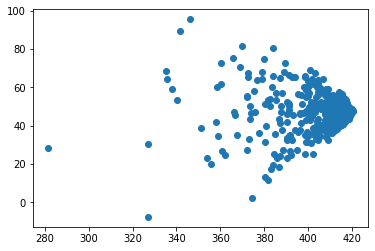

In [ ]:
#Plota dados
plt.figure(1)
plt.scatter(novosDados[0,:],novosDados[1,:])
plt.savefig('SaidaNormal.png', format='png')
plt.show()

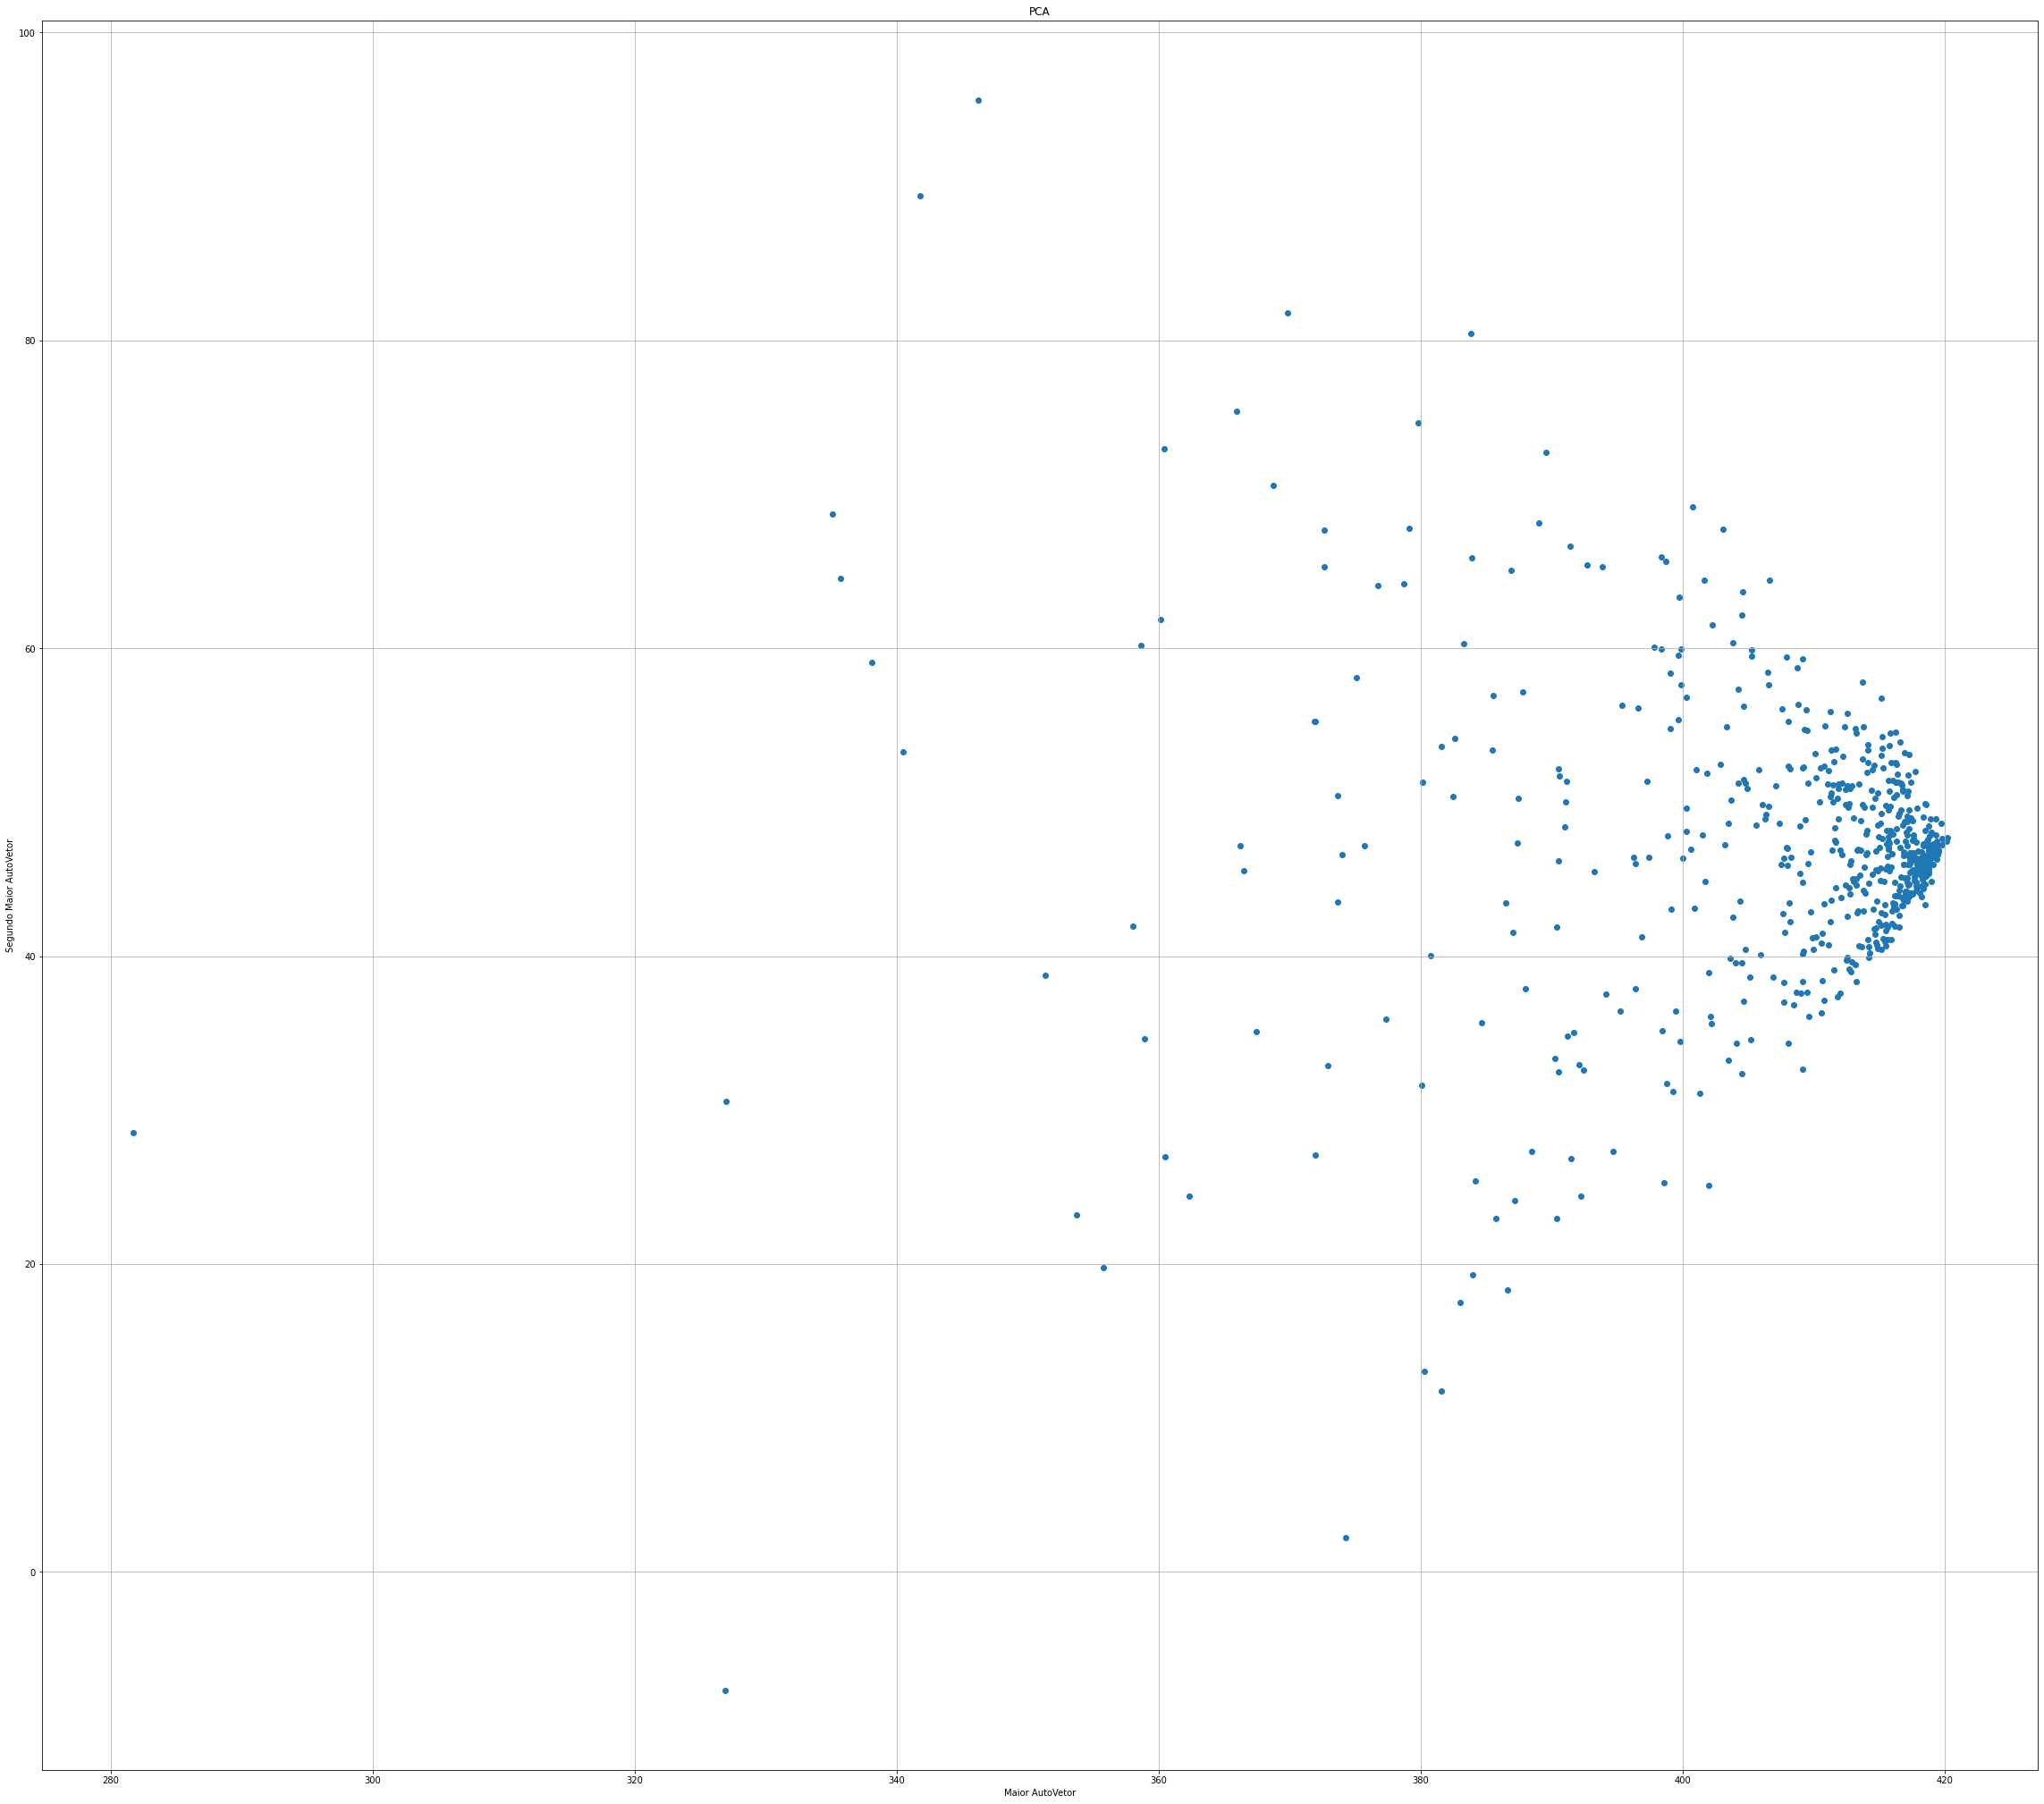

In [ ]:
#Plota dados
plt.figure(1)
plt.scatter(novosDados[0,:],novosDados[1,:])
plt.title('PCA')
plt.xlabel('Maior AutoVetor')
plt.ylabel('Segundo Maior AutoVetor')
plt.grid(True)
plt.gcf().set_size_inches(40, 36)
plt.savefig('SaidaAmpliada.png', format='png')
plt.show()